## Credit Card Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None

### Read data

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc=StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [9]:
data.drop(['Time'],axis=1,inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### Check Duplicates

In [10]:
data.duplicated().any()

True

In [11]:
data=data.drop_duplicates()
data.shape

(275663, 30)

In [12]:
print('Number of duplicates present is',284807-275663)

Number of duplicates present is 9144


### Check if data is balanced

In [13]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [14]:
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

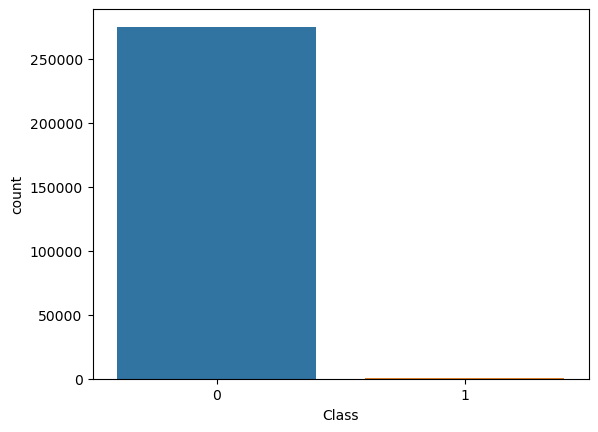

In [15]:
sns.countplot(data,x='Class')

### Splitting data to train and test

In [16]:
X=data.drop('Class',axis=1)
y=data['Class']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train ,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Handling imbalanced dataset

### Undersampling

In [18]:
normal=data[data['Class']==0]
fraud=data[data['Class']==1]

In [19]:
print(normal.shape , fraud.shape)

(275190, 30) (473, 30)


In [20]:
normal_sample=normal.sample(n=473)
normal_sample.shape

(473, 30)

In [21]:
new_data=pd.concat([normal_sample,fraud],ignore_index=True)

In [22]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [23]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.231533,1.827256,0.783692,1.039269,-1.042342,1.155316,-1.681330,-5.519682,0.501172,0.147182,-0.928868,0.311294,-0.495672,0.347755,0.917078,0.148829,0.156189,0.029796,0.306272,-1.271872,4.960867,-2.837121,0.185577,-0.166563,1.454781,-0.514852,0.345969,0.059384,0.026589,0
1,-1.103029,2.428686,-1.103558,0.923257,0.540061,1.762944,-2.705186,-7.580671,-0.844792,-1.533162,-1.027832,0.636820,0.679277,-0.323296,1.332144,0.665531,1.056998,0.583941,-0.235757,0.888919,-0.288603,-0.040851,0.341392,-1.478568,0.847315,-0.123354,0.229398,0.346445,-0.349231,0
2,1.188152,-0.606364,0.113423,-0.298454,-0.972371,-0.789049,-0.481048,-0.062688,-0.565668,0.065629,0.262687,-0.739436,-0.648943,-1.170429,0.365926,0.760275,1.743159,-1.717508,0.167972,0.147556,0.003156,-0.121326,0.005218,0.325198,0.314098,-0.297323,0.021777,0.048766,-0.027785,0
3,1.396985,-0.427455,0.058550,-0.716824,-0.593067,-0.459342,-0.384589,-0.145151,-0.966808,0.646933,-0.543933,-0.022866,0.683377,0.089948,1.085395,-1.535365,0.112591,0.496619,-0.982492,-0.484702,-0.382165,-0.548651,0.030491,-0.234507,0.264208,1.091404,-0.046492,-0.002369,-0.340036,0
4,1.242486,0.283281,-0.157840,0.839305,0.443759,0.098101,0.179549,-0.067612,-0.042782,-0.052103,-0.971886,0.254141,0.743423,0.243913,1.182682,0.024398,-0.546566,-0.341233,-0.358720,-0.073904,0.005099,0.095612,-0.214586,-0.904984,0.763265,-0.239912,0.029807,0.010710,-0.273707,0


In [24]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred1=log.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

In [29]:
print('Accuracy score is ', accuracy_score(y_test,y_pred1))
print('Precision score is ', precision_score(y_test,y_pred1))
print('Recall score is ', recall_score(y_test,y_pred1))
print('f1 score is ', f1_score(y_test,y_pred1))

Accuracy score is  0.9473684210526315
Precision score is  1.0
Recall score is  0.9019607843137255
f1 score is  0.9484536082474228


### Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
y_pred2 = dt.predict(X_test)

In [32]:
print('Accuracy score is ', accuracy_score(y_test,y_pred2))
print('Precision score is ', precision_score(y_test,y_pred2))
print('Recall score is ', recall_score(y_test,y_pred2))
print('f1 score is ', f1_score(y_test,y_pred2))

Accuracy score is  0.9210526315789473
Precision score is  0.9393939393939394
Recall score is  0.9117647058823529
f1 score is  0.9253731343283583


### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
y_pred3 = rf.predict(X_test)

In [35]:
print('Accuracy score is ', accuracy_score(y_test,y_pred3))
print('Precision score is ', precision_score(y_test,y_pred3))
print('Recall score is ', recall_score(y_test,y_pred3))
print('f1 score is ', f1_score(y_test,y_pred3))

Accuracy score is  0.9526315789473684
Precision score is  1.0
Recall score is  0.9117647058823529
f1 score is  0.9538461538461539


In [36]:
Undersampled_data = pd.DataFrame({'Models':['LR','DT','RF'],
                                 "Acc":[accuracy_score(y_test,y_pred1)*100,
                                       accuracy_score(y_test,y_pred2)*100,
                                       accuracy_score(y_test,y_pred3)*100]})

Undersampled_data

,Models,Acc
0,LR,94.736842
1,DT,92.105263
2,RF,95.263158


### Oversampling

In [37]:
X=data.drop('Class',axis=1)
y=data['Class']

In [38]:
X.shape ,y.shape

((275663, 29), (275663,))

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [41]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

### Logistic Regression

In [43]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [44]:
y_pred1=log.predict(X_test)

In [45]:
print('Accuracy score is ', accuracy_score(y_test,y_pred1))
print('Precision score is ', precision_score(y_test,y_pred1))
print('Recall score is ', recall_score(y_test,y_pred1))
print('f1 score is ', f1_score(y_test,y_pred1))

Accuracy score is  0.9454922053853702
Precision score is  0.9730841265857002
Recall score is  0.9162591131392833
f1 score is  0.9438170683746276


### Decision Tree Classifier

In [46]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred2 = dt.predict(X_test)

In [48]:
print('Accuracy score is ', accuracy_score(y_test,y_pred2))
print('Precision score is ', precision_score(y_test,y_pred2))
print('Recall score is ', recall_score(y_test,y_pred2))
print('f1 score is ', f1_score(y_test,y_pred2))

Accuracy score is  0.9979832115992587
Precision score is  0.9973670352817272
Recall score is  0.9986000763594713
f1 score is  0.9979831749550303


### Random Forest Classifier

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
y_pred3 = rf.predict(X_test)

In [51]:
print('Accuracy score is ', accuracy_score(y_test,y_pred3))
print('Precision score is ', precision_score(y_test,y_pred3))
print('Recall score is ', recall_score(y_test,y_pred3))
print('f1 score is ', f1_score(y_test,y_pred3))

Accuracy score is  0.9999364075729495
Precision score is  0.9998727504090166
Recall score is  1.0
f1 score is  0.9999363711561361


In [52]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

final_data

,Models,ACC
0,LR,94.549221
1,DT,99.798321
2,RF,99.993641


### Save the Model


In [53]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [54]:
import joblib

In [55]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [56]:
model = joblib.load("credit_card_model")

In [57]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [58]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation
